In [1]:
import numpy
import pandas as pd
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import tensorflow
import keras
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
source_file = '../../Data/process/resultDados_patio1_completo.csv'
dataframe = pd.read_csv(source_file, delimiter=';',  index_col=0, parse_dates=['Data'])


In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Longitude            8760 non-null   float64       
 1   Latitude             8760 non-null   float64       
 2   Magnitude_Observada  8760 non-null   float64       
 3   Direcao              8760 non-null   float64       
 4   Data                 8760 non-null   datetime64[ns]
 5   Valor_Pressao        8760 non-null   float64       
 6   Valor_Temp           8760 non-null   float64       
 7   Valor_Chuva          8760 non-null   float64       
 8   Magnitude_Verif      8760 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 684.4 KB


In [4]:
dataframe

,Longitude,Latitude,Magnitude_Observada,Direcao,Data,Valor_Pressao,Valor_Temp,Valor_Chuva,Magnitude_Verif
0,-42.75,-14.25,6.82,97.36,2017-01-01 00:00:00,1013.14,25.93,0.00,9.82
1,-42.75,-14.25,6.91,94.65,2017-01-01 01:00:00,1013.34,25.73,0.00,8.74
2,-42.75,-14.25,7.27,92.98,2017-01-01 02:00:00,1013.04,25.50,0.00,8.45
3,-42.75,-14.25,7.83,93.62,2017-01-01 03:00:00,1012.92,23.67,0.00,9.18
4,-42.75,-14.25,7.81,96.33,2017-01-01 04:00:00,1013.07,22.97,0.00,9.19
...,...,...,...,...,...,...,...,...,...
8755,-42.75,-14.25,1.79,92.88,2017-12-31 19:00:00,1010.20,32.56,0.01,7.22
8756,-42.75,-14.25,2.26,86.13,2017-12-31 20:00:00,1009.77,32.50,0.05,6.14
8757,-42.75,-14.25,2.19,86.79,2017-12-31 21:00:00,1010.32,29.74,0.00,6.04
8758,-42.75,-14.25,0.62,105.53,2017-12-31 22:00:00,1010.82,27.67,0.00,6.72


In [5]:
df_day = dataframe[['Data', 'Magnitude_Observada', 'Direcao', 'Valor_Pressao']].groupby('Data').mean()
df_day.head(2)

,Magnitude_Observada,Direcao,Valor_Pressao
Data,,,
2017-01-01 00:00:00,6.82,97.36,1013.14
2017-01-01 01:00:00,6.91,94.65,1013.34


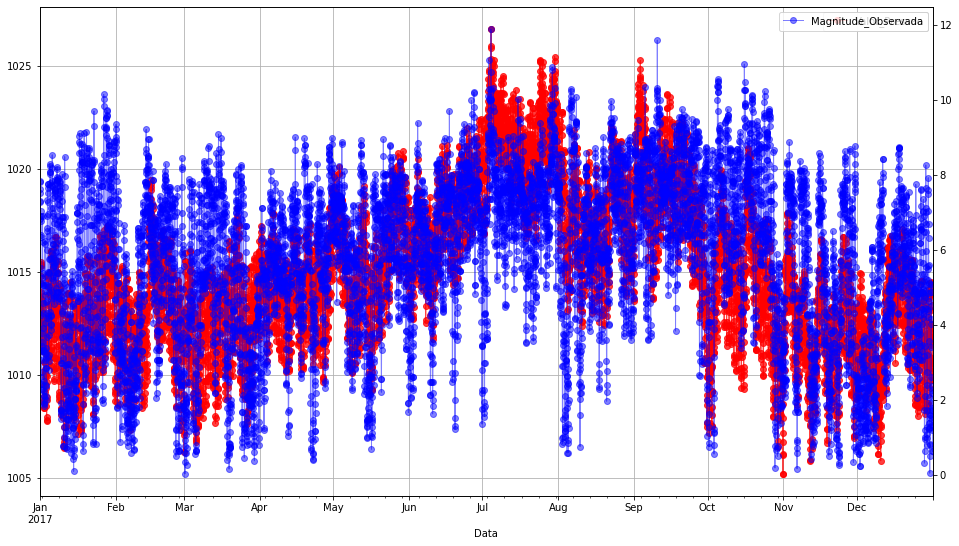

In [6]:
fig = pyplot.figure(figsize=(16, 9))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
_ = df_day.plot(y='Magnitude_Observada', ax=ax2, lw=1, marker='o', color='blue', alpha=0.5)
_ = df_day.plot(y='Valor_Pressao', ax=ax, lw=1, marker='o', color='red', alpha=0.75)
_ = ax.grid()

In [7]:
df_day['V_d1'] = df_day['Magnitude_Observada'].shift(-1)
df_day['V_l1'] = df_day['Magnitude_Observada'].shift(1)
df_day['V_l2'] = df_day['Magnitude_Observada'].shift(2)
df_day['V_l3'] = df_day['Magnitude_Observada'].shift(3)
df_day['D_l1'] = df_day['Direcao'].shift(1)
df_day['D_l2'] = df_day['Direcao'].shift(2)
df_day['D_l3'] = df_day['Direcao'].shift(3)
df_day['P_l1'] = df_day['Valor_Pressao'].shift(1)
df_day['P_l2'] = df_day['Valor_Pressao'].shift(2)
df_day['P_l3'] = df_day['Valor_Pressao'].shift(3)
complete_cases = ~df_day.isna().any(axis=1)
dfn = df_day[complete_cases]

In [8]:
df_day

,Magnitude_Observada,Direcao,Valor_Pressao,V_d1,V_l1,V_l2,V_l3,D_l1,D_l2,D_l3,P_l1,P_l2,P_l3
Data,,,,,,,,,,,,,
2017-01-01 00:00:00,6.82,97.36,1013.14,6.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 01:00:00,6.91,94.65,1013.34,7.27,6.82,NaN,NaN,97.36,NaN,NaN,1013.14,NaN,NaN
2017-01-01 02:00:00,7.27,92.98,1013.04,7.83,6.91,6.82,NaN,94.65,97.36,NaN,1013.34,1013.14,NaN
2017-01-01 03:00:00,7.83,93.62,1012.92,7.81,7.27,6.91,6.82,92.98,94.65,97.36,1013.04,1013.34,1013.14
2017-01-01 04:00:00,7.81,96.33,1013.07,7.63,7.83,7.27,6.91,93.62,92.98,94.65,1012.92,1013.04,1013.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 19:00:00,1.79,92.88,1010.20,2.26,1.56,1.32,1.18,108.61,117.25,96.42,1010.69,1011.67,1012.33
2017-12-31 20:00:00,2.26,86.13,1009.77,2.19,1.79,1.56,1.32,92.88,108.61,117.25,1010.20,1010.69,1011.67
2017-12-31 21:00:00,2.19,86.79,1010.32,0.62,2.26,1.79,1.56,86.13,92.88,108.61,1009.77,1010.20,1010.69


In [9]:
# TRAINING
n_test_samples = 30
n_validation_samples = 30
random_seed = 32

# SET THE RANDOM SEED
numpy.random.seed(random_seed)
tensorflow.random.set_seed(random_seed)

x_cols = ['Magnitude_Observada', 'V_l1','V_l2','V_l3', 'D_l1','D_l2','D_l3', 'P_l1','P_l2','P_l3']
y_cols = ['V_d1']

# SAMPLING
X_trn = dfn.iloc[:-(n_validation_samples + n_test_samples)][x_cols].to_numpy()
X_val = dfn.iloc[-(n_validation_samples + n_test_samples):-n_test_samples][x_cols].to_numpy()
X_tst = dfn[x_cols].to_numpy()
Y_trn = dfn.iloc[:-(n_validation_samples + n_test_samples)][y_cols].to_numpy()
Y_val = dfn.iloc[-(n_validation_samples + n_test_samples):-n_test_samples][y_cols].to_numpy()

# SCALING X
X_scaler = StandardScaler()
X_scaler = X_scaler.fit(X_trn)
X_trn_scaled = X_scaler.transform(X_trn)
X_val_scaled = X_scaler.transform(X_val)
X_tst_scaled = X_scaler.transform(X_tst)

# SCALING Y
Y_scaler = StandardScaler()
Y_scaler = Y_scaler.fit(Y_trn)
Y_trn_scaled = Y_scaler.transform(Y_trn)
Y_val_scaled = Y_scaler.transform(Y_val)

# DECLARE NET
max_neurons = 20
PATIENCE = 250
MAX_EPOCHS = 10*PATIENCE
LEARNING_RATE = 0.01
HIDDEN_ACTIVATION = 'relu'
MODEL_LOSS = 'val_loss'
MIN_IMPROVEMENT = 0.025

best_loss = 1000.0
best_val_loss = 1000.0
training_result_list = []
for n_neurons in numpy.arange(max_neurons) + 1:
    inputs = keras.Input(shape=(X_trn_scaled.shape[1]))
    hidden = keras.layers.Dense(n_neurons, activation=HIDDEN_ACTIVATION)(inputs)
    outputs = keras.layers.Dense(Y_trn_scaled.shape[1], activation='linear')(hidden)
    model_name = 'FORECAST_{}_{}'.format(HIDDEN_ACTIVATION, n_neurons)
    my_net = keras.Model(inputs=inputs, outputs=outputs, name=model_name)
    my_net.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE), loss='mse')
    es_callback = EarlyStopping(monitor='val_loss', mode='min', patience=PATIENCE, restore_best_weights=True)
    history = my_net.fit(X_trn_scaled, Y_trn_scaled, epochs=MAX_EPOCHS, validation_data=(X_val_scaled, Y_val_scaled), batch_size=X_trn_scaled.shape[0], callbacks=[es_callback], verbose=0)
    model_loss = history.history['loss'][-1]
    model_val_loss = history.history['val_loss'][-1]
    epochs = len(history.history['val_loss'])

    has_improved_val_loss = False
    loss_improvement = 1.0 - model_val_loss/best_val_loss

    if loss_improvement >= MIN_IMPROVEMENT:
        is_best_net = ((model_loss <= best_loss) & (model_val_loss < best_val_loss))

        if is_best_net:
                best_loss = model_loss
                best_val_loss = model_val_loss
                best_net = my_net
                best_history = history
                best_text = '***BEST NET!***'
                improvement_text = '{:.0f}% GAIN'.format(100.0*loss_improvement)
                best_name = model_name
                best_epochs = epochs
        else:
            best_text = ''
            improvement_text = ''
    else:
        print('EXTRA NEURON DIDNT IMPROVE NET {:.0f}% GAIN'.format(100.0*loss_improvement))
        break
    result_dict = {'model_name': model_name, 'epochs': epochs, 'model_loss': model_loss, 'model_val_loss': model_val_loss, 'best_net':is_best_net}
    training_result_list.append(result_dict)
    print('{} RESULTS > EPOCHS: {} LOSS: {:.3f} VAL_LOSS: {:.3f} {} {}'.format(model_name, epochs, model_loss, model_val_loss, best_text, improvement_text)) 

FORECAST_relu_1 RESULTS > EPOCHS: 1131 LOSS: 0.054 VAL_LOSS: 0.085 ***BEST NET!*** 100% GAIN
EXTRA NEURON DIDNT IMPROVE NET 2% GAIN


In [10]:
Y_est_scaled = best_net.predict(X_tst_scaled)
Y_est = Y_scaler.inverse_transform(Y_est_scaled)
df_day.loc[complete_cases, ['Y_est']] = Y_est
df_day['residual'] = df_day['Y_est'] - df_day['V_d1']
df_day['rabs'] = df_day['residual'].abs()
model_r2_score = r2_score(df_day.loc[complete_cases, 'V_d1'].to_numpy(), df_day.loc[complete_cases, 'Y_est'].to_numpy())

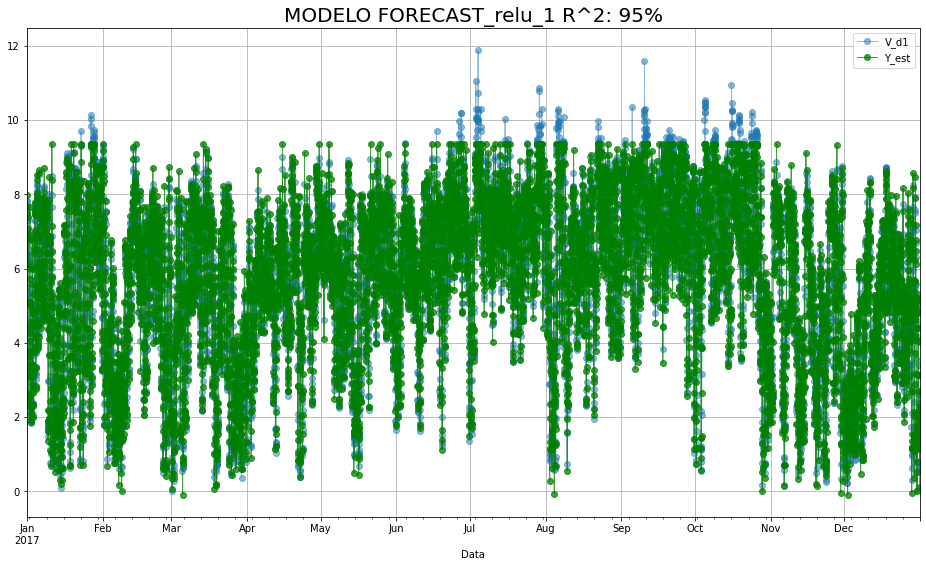

In [11]:
fig = pyplot.figure(figsize=(16, 9))
ax = fig.add_subplot(111)
_ = df_day.plot(y='V_d1', ax=ax, lw=1, marker='o', alpha=0.5)
_ = df_day.plot(y='Y_est', ax=ax, lw=1, marker='o', alpha=0.75, color='green')
_ = ax.grid()
_ = ax.set_title('MODELO {} R^2: {:.0f}%'.format(best_name, 100.0*model_r2_score), size=20)

In [12]:
df_day.sort_values('rabs', ascending=False)

,Magnitude_Observada,Direcao,Valor_Pressao,V_d1,V_l1,V_l2,V_l3,D_l1,D_l2,D_l3,P_l1,P_l2,P_l3,Y_est,residual,rabs
Data,,,,,,,,,,,,,,,,
2017-07-04 10:00:00,8.83,111.66,1025.37,11.88,10.29,10.22,9.98,113.33,113.92,114.63,1024.62,1024.32,1023.67,7.893638,-3.986362,3.986362
2017-07-29 10:00:00,6.98,110.89,1023.38,10.16,8.13,8.51,8.43,113.39,110.92,111.10,1022.96,1022.65,1022.88,6.393408,-3.766592,3.766592
2017-09-10 10:00:00,9.01,97.16,1019.09,11.59,10.27,10.23,10.16,96.39,96.81,96.41,1018.26,1017.98,1017.52,8.168764,-3.421236,3.421236
2017-12-09 23:00:00,3.10,327.01,1007.93,5.16,5.01,4.52,4.57,307.09,311.33,316.18,1007.44,1007.32,1006.16,1.960443,-3.199557,3.199557
2017-07-28 10:00:00,5.65,113.67,1022.03,8.49,6.45,6.90,6.34,113.94,113.82,115.29,1021.46,1020.76,1020.90,5.351358,-3.138642,3.138642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-23 18:00:00,8.16,114.48,1018.14,8.15,8.04,8.54,9.13,114.91,112.29,110.75,1018.55,1019.14,1019.84,8.150131,0.000131,0.000131
2017-01-01 00:00:00,6.82,97.36,1013.14,6.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 01:00:00,6.91,94.65,1013.34,7.27,6.82,NaN,NaN,97.36,NaN,NaN,1013.14,NaN,NaN,NaN,NaN,NaN
